In [59]:
import math
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from main import nmf
np.random.seed(42)

In [2]:
%matplotlib inline

In [42]:
mat = scipy.io.loadmat('Urban.mat')
X = mat['X']

In [43]:
m, n = X.shape # (162, 94249)
num_col = int(math.sqrt(n)) # 307

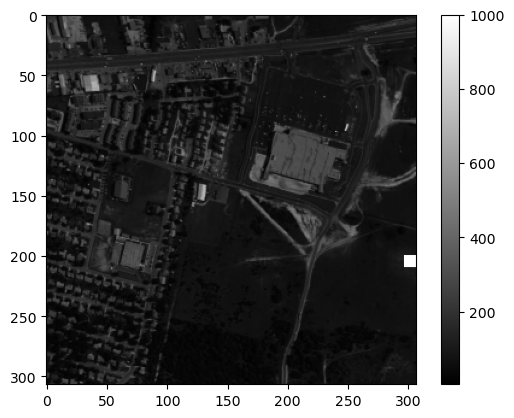

In [47]:
img = X[40, :].reshape(num_col, num_col, order='F').copy()
img[200: 210, 297: 307] = 1000
plt.imshow(img, cmap='gray')
plt.colorbar()

In [22]:
X3d = X.reshape(m, num_col, num_col, order='F') # order specified to match MATLAB

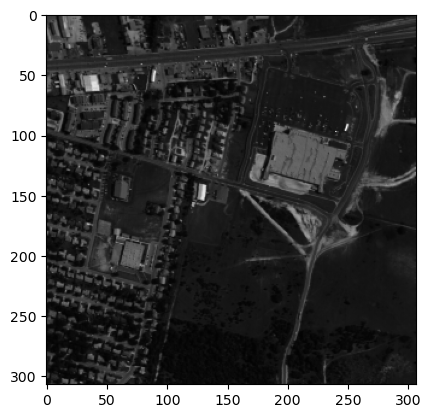

In [24]:
plt.imshow(X3d[40, :, :], cmap='gray')

In [26]:
(X3d[40, :, :] == img).all()

True

In [54]:
trees3d = X3d[:, 297: 307, 120: 130] # (162, 10, 10)
trees_arr = trees3d.reshape(m, -1, order='F') # (162, 100)

In [55]:
asphalt3d = X3d[:, 50: 60, 185: 195] # (162, 10, 10)
asphalt_arr = trees3d.reshape(m, -1, order='F') # (162, 100)

In [56]:
grass3d = X3d[:, 200: 210, 297: 307] # (162, 10, 10)
grass_arr = trees3d.reshape(m, -1, order='F') # (162, 100)

In [57]:
mini_X = np.hstack([trees_arr, asphalt_arr, grass_arr]) # (162, 300)

In [58]:
r = 6
W_ini = np.random.rand(m, r)
H_ini = np.random.rand(r, 300)

In [ ]:
Wb, Hb, Wl, Hl, fscores, gscores = nmf(mini_X, Wl, Hl, _lambda=0.6, itermax=100)

0 [881.28357024]
1 [880.3714565]
2 [879.46619483]
3 [878.56768432]
4 [877.67584984]
5 [876.79062367]
6 [875.91193407]
7 [875.03971362]
8 [874.17387388]
9 [873.3143371]
10 [872.46099166]
11 [871.6138042]
12 [870.7727559]
13 [869.93776788]
14 [869.10875193]
15 [868.28562779]
16 [867.46835488]
17 [866.65692551]
18 [865.85129817]
19 [865.05142399]
20 [864.25724296]
21 [863.46869866]
22 [862.68572893]
23 [861.90827455]
24 [861.13627848]
25 [860.36968279]
26 [859.60838041]
27 [858.85230946]
28 [858.10141374]
29 [857.35564133]
30 [856.6149351]
31 [855.87924076]
32 [855.14844305]
33 [854.42251656]
34 [853.70138756]
35 [852.98492522]
36 [852.2732496]
37 [851.56628678]
38 [850.86395971]
39 [850.1662423]
40 [849.47308912]
41 [848.78445637]
42 [848.10029887]
43 [847.420576]
44 [846.74524222]
45 [846.07425518]
46 [845.40757347]
47 [844.74515523]
48 [844.08693303]
49 [843.43281058]
50 [842.78277151]
51 [842.13680959]
52 [841.49491008]
53 [840.8568654]
54 [840.22278317]
55 [839.59264928]
56 [838.9664

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_yscale('log')
ax.plot(fscores)
ax.plot(gscores)
ax.plot(fscores + 0.6 * gscores)
ax.legend(['f', 'g', 'total'])